In [2]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import os
import csv


## Open Dataset Files

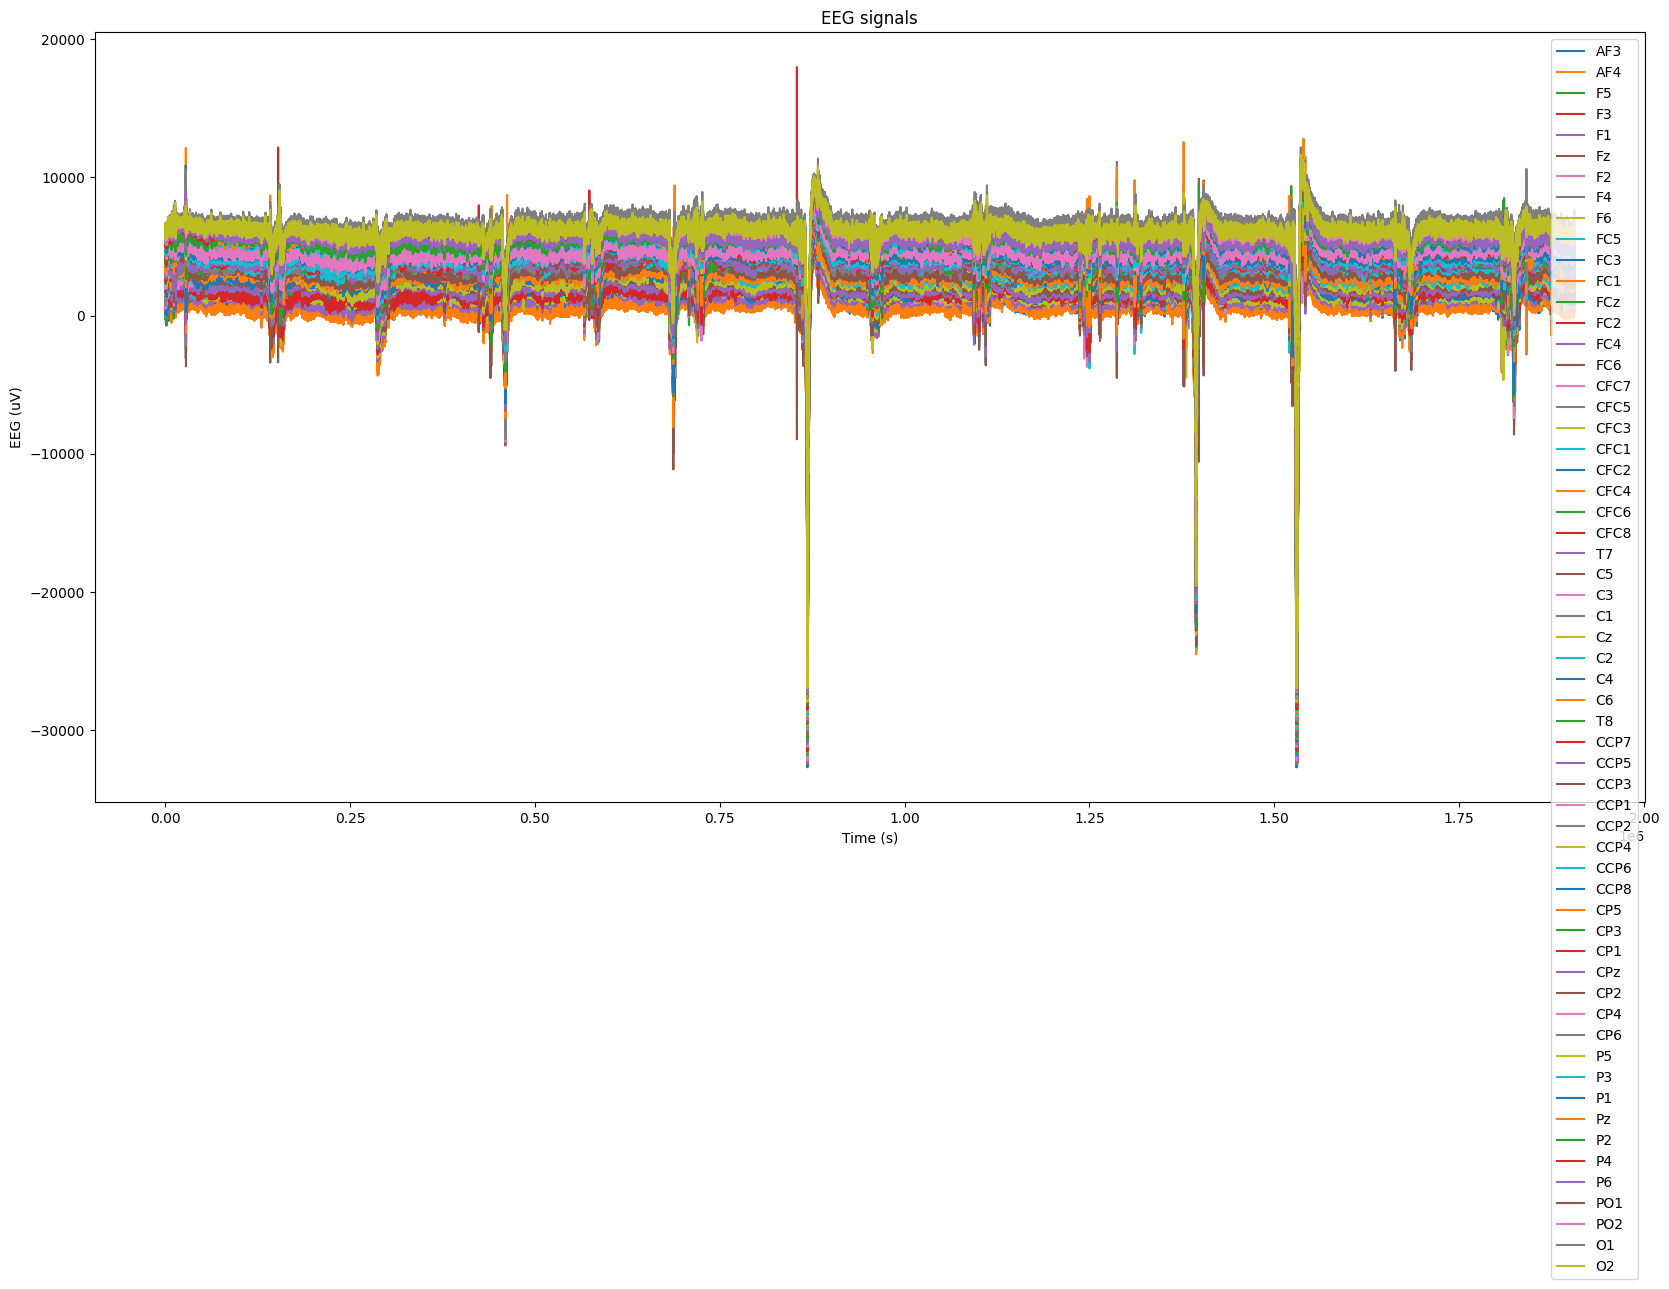

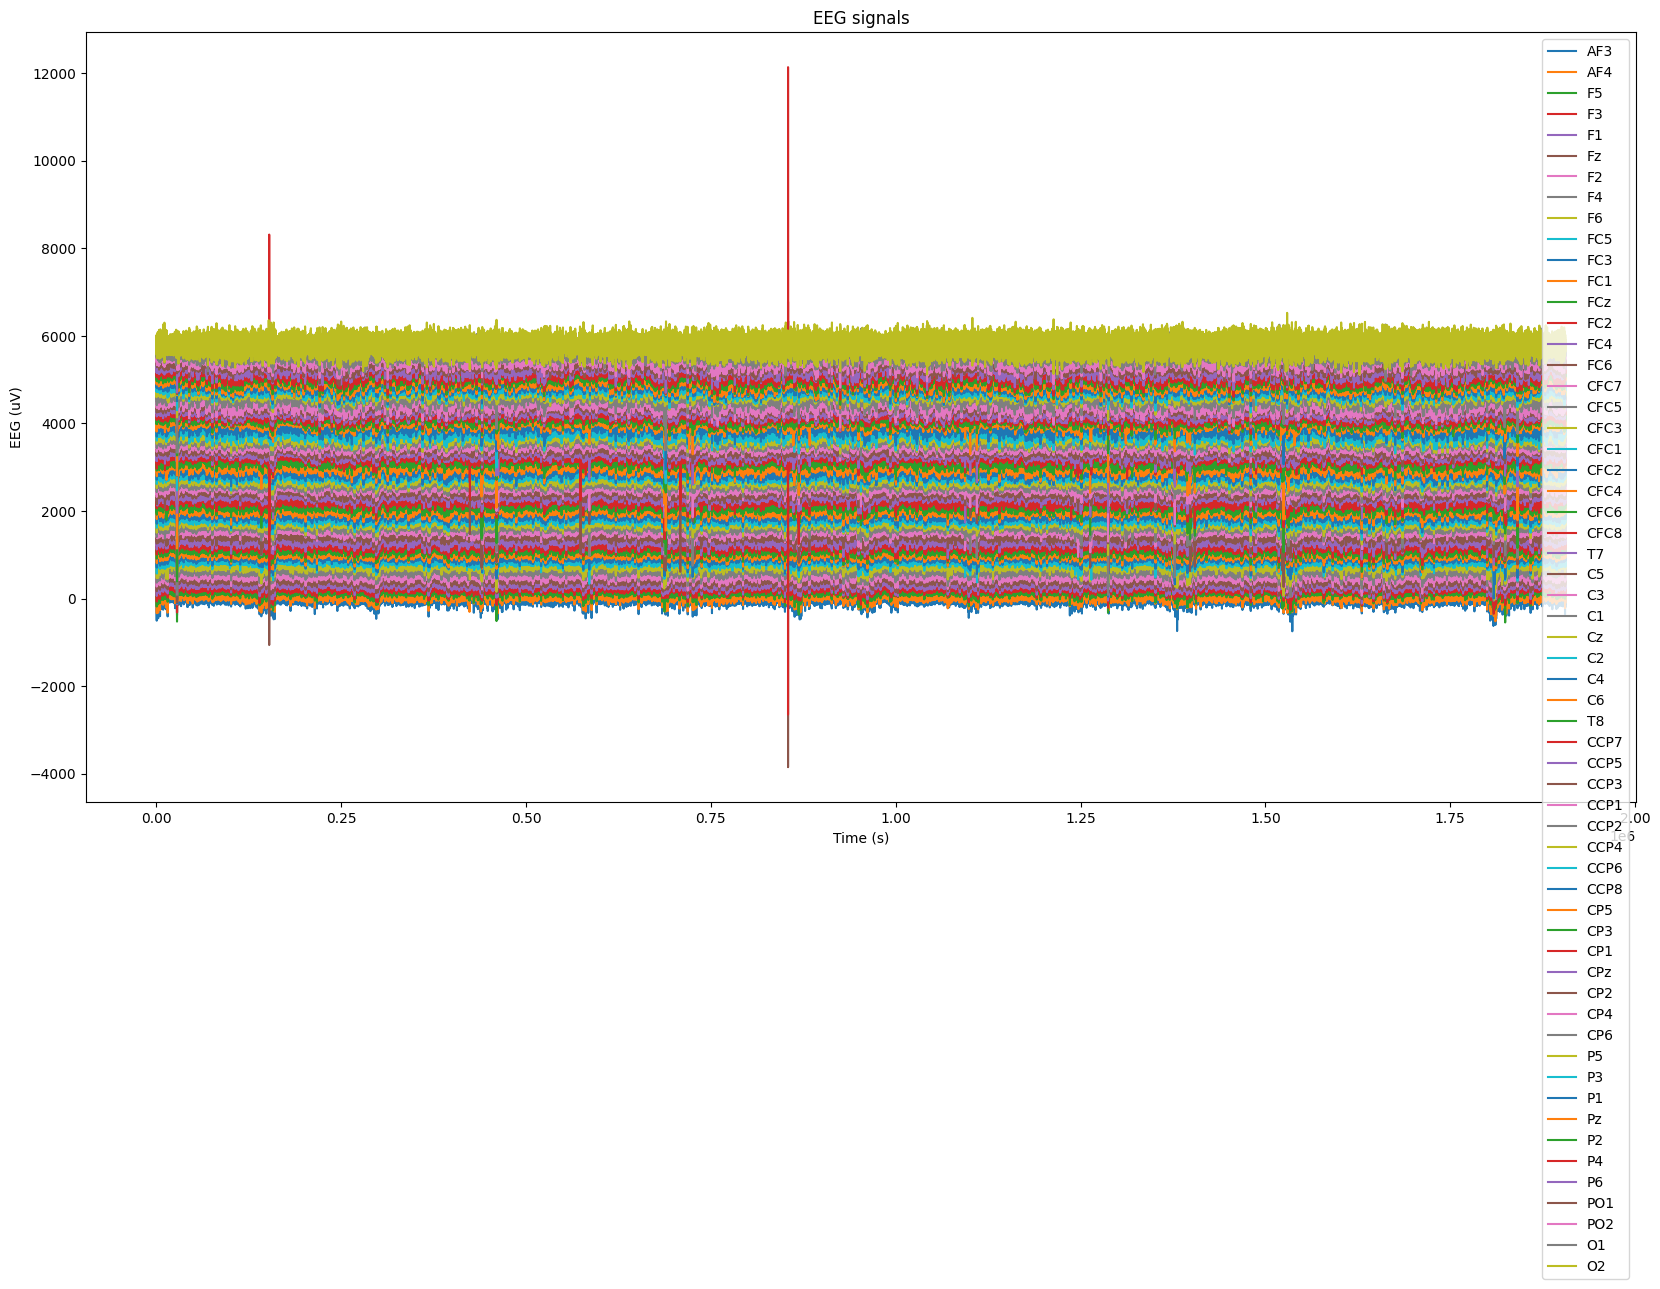

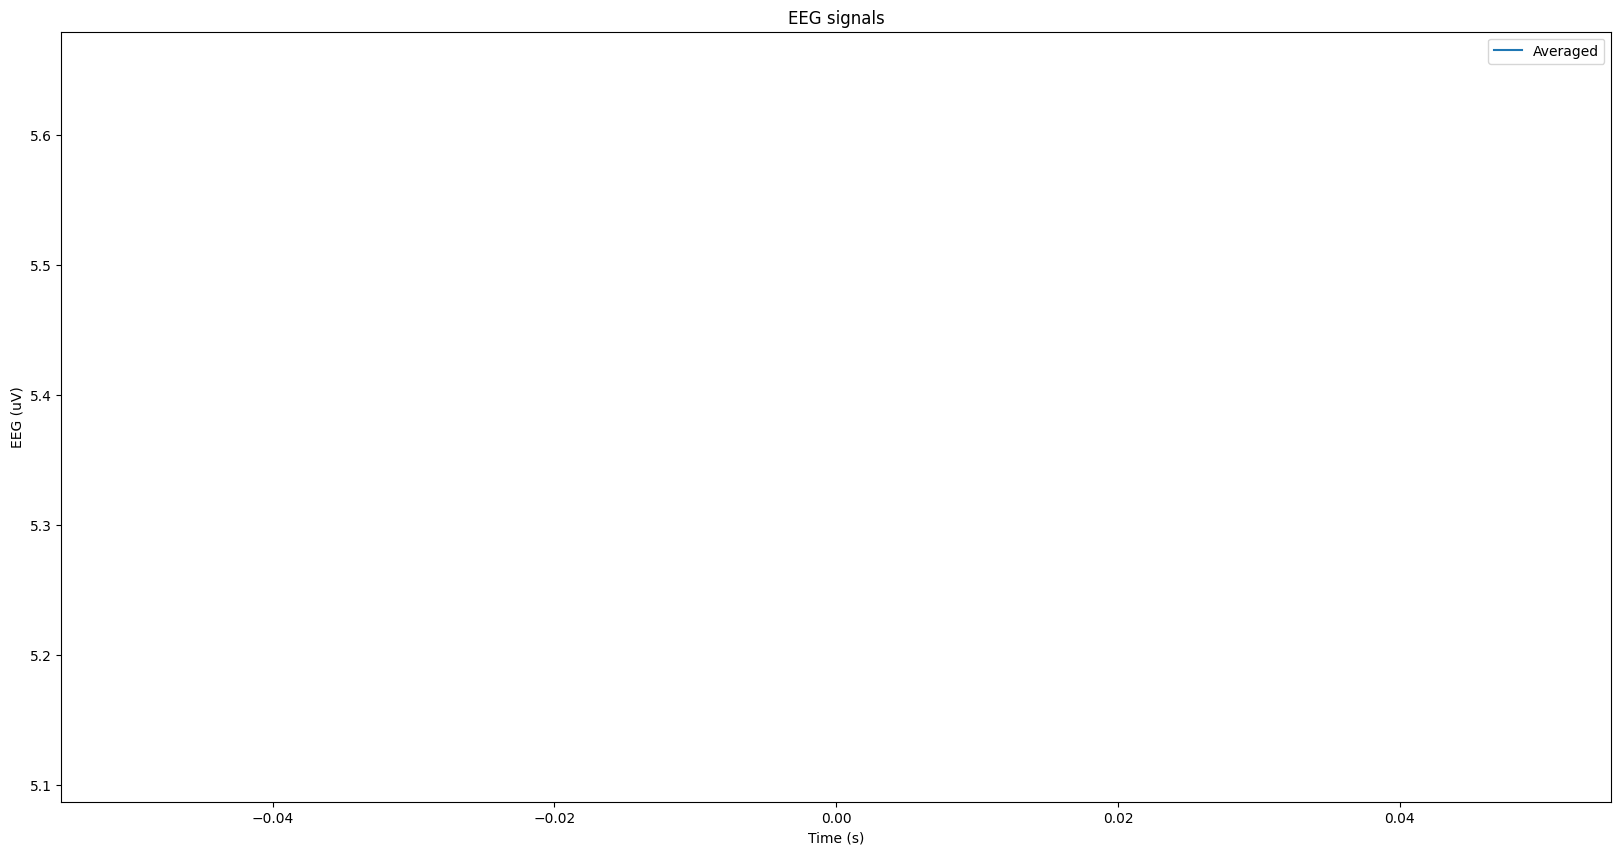

In [9]:
# load .mat from dataset

filename =  r'Data/BCICIV_1calib_1000Hz_mat/BCICIV_calib_ds1a_1000Hz.mat'

# get data from .mat
def inputmat(fp):
    """load .mat file and return m as a dict"""
    mat = loadmat(fp, squeeze_me=True)
    td = {}  # create a dict

    # Numpy array of size channel_num * points.
    td['data'] = mat['cnt'].T  # data
    td['freq'] = mat['nfo']['fs'][True][0]  # Sampling frequency

    # channel names are necessary information for creating a rawArray.
    td['ch_names'] = mat['nfo']['clab'][True][0]

    # Position of channels
    
    td['electrode_x'] = mat['nfo']['xpos'][True][0]
    td['electrode_y'] = mat['nfo']['ypos'][True][0]

    #make trials by finding trials and its data
    td['cue'] = mat['mrk']['pos'][True][0] #time of cue
    td['labels'] = mat['mrk']['y'][True][0] #labels of the data
    return td

data_dict = inputmat(filename)

# display dict as signal plots for each channel in data
def plot_data(data_dict):
    """plot data from data_dict"""
    import matplotlib.pyplot as plt
    import numpy as np
    data = data_dict['data']
    ch_names = data_dict['ch_names']
    electrode_x = data_dict['electrode_x']
    electrode_y = data_dict['electrode_y']
    cue = data_dict['cue']
    labels = data_dict['labels']
    freq = data_dict['freq']
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(20, 10)
    for i in range(len(ch_names)):
        ax.plot(data[i] + i * 100, label=ch_names[i])
    ax.legend(loc='upper right')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('EEG (uV)')
    ax.set_title('EEG signals')
    plt.show()
    return

plot_data(data_dict)
# filter data using bandpass 7 - 30 Hz
def filter_data(data_dict):
    """filter data from data_dict"""
    from scipy import signal
    data = data_dict['data']
    freq = data_dict['freq']
    # bandpass filter
    b, a = signal.butter(4, [7, 30], btype='bandpass', fs=freq)
    data = signal.filtfilt(b, a, data, axis=1)
    data_dict['data'] = data
    return data_dict

plot_data(filter_data(data_dict))

def averaged_data(data_dict):
    """augment the data from the multiple channels into one augmented channel"""
    data = data_dict['data']
    labels = data_dict['labels']
    freq = data_dict['freq']
    cue = data_dict['cue']
    # create a new channel by averaging all the channels
    new_data = np.zeros((data.shape[1], 1))
    for i in range(data.shape[1]):
        new_data[i] = np.mean(data[:, i])
    data_dict['data'] = new_data
    data_dict['ch_names'] = ['Averaged']
    
    return data_dict

plot_data(averaged_data(filter_data(data_dict)))